# Imports


In [1]:
import numpy as np
# Import opencv for computer vision
import cv2 
# Import matplotlib to visualize an image
from matplotlib import pyplot as plt
from __future__ import print_function
import sys
import cv2
from random import randint


## 2. Track location of Thymio and goal

Potential solutions:
1. Using Tensorflow
https://www.youtube.com/watch?v=yqkISICHH-U

2. Using MultiTracker OpenCV
https://learnopencv.com/multitracker-multiple-object-tracking-using-opencv-c-python/

### Using MultiTracker OpenCV


Start by creating a single object tracker
- below doesnt work

Read the first frame of livestream
* May need to modify

Locate objects in the first frame

Check out
https://www.youtube.com/watch?v=8ktcGQ-XreQ

Perhaps use YOLOv5:
https://blog.paperspace.com/train-yolov5-custom-data/


https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/


# Path Planning

## 1. Dijkstra Algorithm

I am still fine-tuning the computer vision code. For now, use this image as a reference and and these coordinates to begin working on the algorithm.

Img height: 640
Img width: 640

In [2]:
from PIL import Image



from dijkstar import Graph, find_path
from IPython.display import display

import networkx as nx
import matplotlib.pyplot as plt




path="images/sample_img.jpg"
display(Image.open(path))

FileNotFoundError: [Errno 2] No such file or directory: 'images/sample_img.jpg'

{
    "boxes": [
        {
            "label": "obstacle",
            "x": 129,
            "y": 180.5,
            "width": 118,
            "height": 207.5
        },
        {
            "label": "obstacle",
            "x": 284.5,
            "y": 517.5,
            "width": 116.5,
            "height": 203.5
        },
        {
            "label": "obstacle",
            "x": 412.5,
            "y": 254,
            "width": 91.5,
            "height": 162
        },
        {
            "label": "goal",
            "x": 556,
            "y": 203,
            "width": 44,
            "height": 78
        },
        {
            "label": "Thymio",
            "x": 151,
            "y": 413,
            "width": 125,
            "height": 215.5
        }
    ],
    "height": 640,
    "key": "arena (8).jpg",
    "width": 640
}

In [3]:
obstacle_coord = []

for box in obstacle_box:
    x1 = box[0]
    y1 = box[1]
    x2 = x1 + box[2]
    y2 = y1 + box[3]

    full_box = [x1, y1, x2, y2]
    obstacle_coord.append(full_box)

print(f"Obstacle coordinates: {obstacle_coord}")
print("")
print("")
print("")
# additing the missing point coordinates

obs_nbr=len(obstacle_coord)

for x in range(obs_nbr):
    obstacle_coord[x].insert(4,obstacle_coord[x][2])
    obstacle_coord[x].insert(5,obstacle_coord[x][1])

    obstacle_coord[x].insert(6,obstacle_coord[x][0])
    obstacle_coord[x].insert(7,obstacle_coord[x][3])



#re-organizing the coordinate top_left,top_right,lower_left,lower_right

temp_coord=[0,0]

for i in range(obs_nbr):
    temp_coord[0]=obstacle_coord[i][2]
    temp_coord[1]=obstacle_coord[i][3]
    
    obstacle_coord[i][2]=obstacle_coord[i][4]
    obstacle_coord[i][3]=obstacle_coord[i][5]
    obstacle_coord[i][4]=obstacle_coord[i][6]
    obstacle_coord[i][5]=obstacle_coord[i][7]
    obstacle_coord[i][6]=temp_coord[0]
    obstacle_coord[i][7]=temp_coord[1]
    

print(obstacle_coord)




NameError: name 'obstacle_box' is not defined

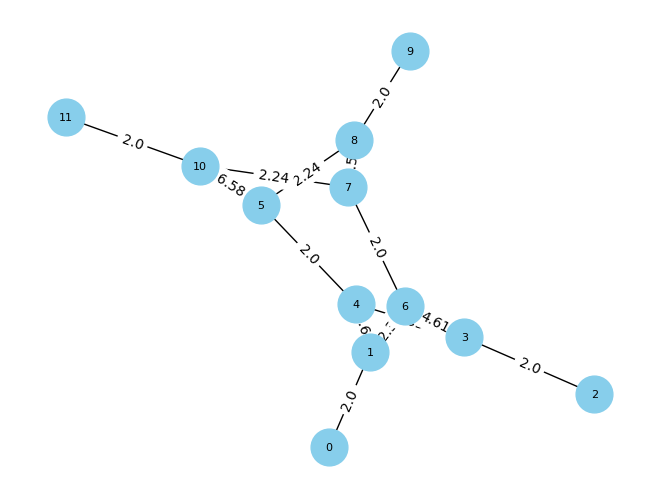

PathInfo(nodes=[0, 1, 4, 3, 2], edges=[2.0, 4.61, 5.83, 2.0], costs=[2.0, 4.61, 5.83, 2.0], total_cost=14.440000000000001)


In [5]:
obs_nbr = 3
corner_nbr=obs_nbr*4
node_coord_x=[]
node_coord_y=[]
max_coord_y=15
import math
obstacle_coord=[[2,10,4,10,2,8,4,8],[7,3,9,3,7,1,9,1],[10,7,12,7,10,5,12,5]]


def distance(node1,node2):
    distance=math.sqrt((node_coord_x[node2]-node_coord_x[node1])**2+(node_coord_y[node2]-node_coord_y[node1])**2)
    distance=round(distance,2)
    return distance
def distance_goal_node(goal,node):
    distance=math.sqrt((goal_coord_x[goal]-node_coord_x[node])**2+(goal_coord_y[goal]-node_coord_y[node])**2)
    distance=round(distance,2)
    return distance

def distance_node_goal(node,goal):
    distance=math.sqrt((goal_coord_x[goal]-node_coord_x[node])**2+(goal_coord_y[goal]-node_coord_y[node])**2)
    distance=round(distance,2)
    return distance




for obstacle in range(obs_nbr):
    for corner_high in range(2):
        node_coord_y.append(max_coord_y-((max_coord_y-obstacle_coord[obstacle][(2*corner_high)+1])/2))
        node_coord_x.append(obstacle_coord[obstacle][(2*corner_high)])
    for corner_low in range(2):
        node_coord_y.append(obstacle_coord[obstacle][(2*corner_low)+5]/2)
        node_coord_x.append(obstacle_coord[obstacle][(2*corner_low)+4])

def draw_graph(graph_data):
    # Créer un objet Graph avec networkx
    G = nx.Graph()

    # Ajouter des nœuds et des liens au graphique
    for node, edges in graph_data.items():
        G.add_node(node)
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)

    # Dessiner le graphique
    pos = nx.spring_layout(G)  # position des nœuds pour un aspect plus lisible
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Afficher le graphique
    plt.show()


def connect_nodes(obs_nbr):    
    graph = Graph ()
    for nb_node in range(obs_nbr*4-1):
        if nb_node % 2 == 0:
            graph.add_edge(nb_node, nb_node + 1, distance(nb_node, nb_node + 1))
            if nb_node > 3:
                graph.add_edge(nb_node, nb_node -3, distance(nb_node, nb_node -3))
        else:
            graph.add_edge(nb_node, nb_node - 1, distance(nb_node, nb_node - 1))
            if nb_node < (obs_nbr-1)*4:
                graph.add_edge(nb_node, nb_node + 3, distance(nb_node, nb_node + 3))
                if (nb_node-1) % 4 == 0:
                    graph.add_edge(nb_node, nb_node + 5, distance(nb_node, nb_node + 5))
                else:
                    graph.add_edge(nb_node, nb_node + 1, distance(nb_node, nb_node + 1))
                    
    draw_graph(graph)
    shortest_path = find_path(graph, 0, 2)
    print(shortest_path)   


# graph = Graph ()
# graph.add_edge(0, 1, distance(0, 1))
# graph.add_edge(1, 0, distance(1, 0))

# graph.add_edge(2, 3, distance(2, 3))
# graph.add_edge(3, 2, distance(3, 2))

# graph.add_edge(1, 4, distance(1, 4))
# graph.add_edge(4, 1, distance(4, 1))

# graph.add_edge(3, 6, distance(3, 6))
# graph.add_edge(6, 3, distance(6, 3))

# graph.add_edge(1, 6, distance(1, 6))
# graph.add_edge(6, 1, distance(6, 1))

# graph.add_edge(3, 4, distance(3, 4))
# graph.add_edge(4, 3, distance(4, 3))

# graph.add_edge(4, 5, distance(4, 5))
# graph.add_edge(5, 4, distance(5, 4))

# graph.add_edge(6, 7, distance(6, 7))
# graph.add_edge(7, 6, distance(7, 6))

# graph.add_edge(5, 8, distance(5, 8))
# graph.add_edge(8, 5, distance(8, 5))

# graph.add_edge(7, 10, distance(7, 10))
# graph.add_edge(10, 7, distance(10, 7))

# graph.add_edge(5, 10, distance(5, 10))
# graph.add_edge(10, 5, distance(10, 5))

# graph.add_edge(7, 8, distance(7, 8))
# graph.add_edge(8, 7, distance(8, 7))

# graph.add_edge(8, 9, distance(8, 9))
# graph.add_edge(9, 8, distance(9, 8))

# graph.add_edge(10, 11, distance(10, 11))
# graph.add_edge(11, 10, distance(11, 10))
# draw_graph(graph)
# shortest_path = find_path(graph, 0, 2)
# print(shortest_path)

connect_nodes(3)


In [13]:
goal_coord_x=[1,14]   
goal_coord_y=[9,1]
thymio=100
goal=101
offset=obs_nbr*4



def localisation(object):
    column=0
    break_flag=0
    for obstacle in range(obs_nbr):
        for corner in range(2):
            
            if goal_coord_x[object]<obstacle_coord[obstacle][(2*corner)]:
                print("break")
                print(obstacle,corner)
                break_flag=1
                break
            column+=1
        if break_flag==1:
            break
            
    print(column)
    if column % 2 == 0:
    
        if column < 2 * obs_nbr:
            graph.add_edge(object + offset, 2 * column, distance_goal_node(object, 2 * column))
            graph.add_edge(2 * column, object + offset, distance_node_goal(2 * column, object))

            graph.add_edge(object + offset, 2 * column + 2, distance_goal_node(object, 2 * column + 2))
            graph.add_edge(2 * column + 2, object + offset, distance_node_goal(2 * column + 2, object))
    
        if column > 0:
            graph.add_edge(object + offset, 2 * column - 1, distance_goal_node(object, 2 * column - 1))
            graph.add_edge(2 * column - 1, object + offset, distance_node_goal(2 * column - 1, object))

            graph.add_edge(object + offset, 2 * column - 3, distance_goal_node(object, 2 * column - 3))
            graph.add_edge(2 * column - 3, object + offset, distance_node_goal(2 * column - 3, object))
  
    else:
        if goal_coord_y[object] > obstacle_coord[math.floor((column - 1) / 2)][1]:
            graph.add_edge(object + offset, (2 * column) - 1, distance_goal_node(object, (2 * column) - 1))
            graph.add_edge((2 * column) - 1, object + offset, distance_node_goal((2 * column) - 1, object))

            graph.add_edge(object + offset, (2 * column) - 2, distance_goal_node(object, (2 * column) - 2))
            graph.add_edge((2 * column) - 2, object + offset, distance_node_goal((2 * column) - 2, object))
        else:
            graph.add_edge(object + offset, (2 * column), distance_goal_node(object, (2 * column)))
            graph.add_edge((2 * column), object + offset, distance_node_goal((2 * column), object))

            graph.add_edge(object + offset, (2 * column) + 1, distance_goal_node(object, (2 * column) + 1))
            graph.add_edge((2 * column) + 1, object + offset, distance_node_goal((2 * column) + 1, object))


localisation(0)
localisation(1)
            



draw_graph(graph)
shortest_path = find_path(graph, 12, 13)
print(shortest_path)
            


NameError: name 'Graph' is not defined

In [1]:

clear()
